In [1]:
from scipy.optimize import minimize
import seaborn as sns
import pylab as plt
import numpy as np
import plot_functions as plotf
import bootstrap_functions as bootf
import model_functions as modelf
import read_experimental_data as e_data

np.random.seed(0)
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


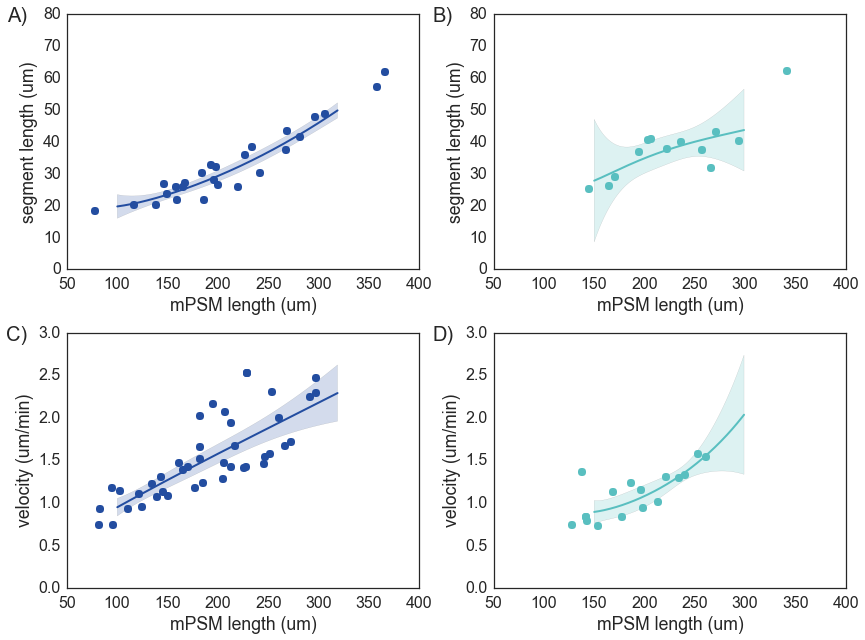

In [2]:
# Obtaining experimental data from Lauschke et al 2013 for temperatures 37 and 33 C
d37, d33 = e_data.readData_Lauschke2013()

# range of the mPSM
d37['rPSM'] = np.arange(100, 320, 1)
d33['rPSM'] = np.arange(150, 300, 1)

# getting and plotting a boostrap fit of segmentation properties. 
bootf.fit_parameters(d37, npoly=2, case='ex-vivo')
bootf.fit_parameters(d33, npoly=2, case='ex-vivo')
plotf.bstrapfit(d37, d33, p=None, outx=None, params=None, case='ex-vivo')

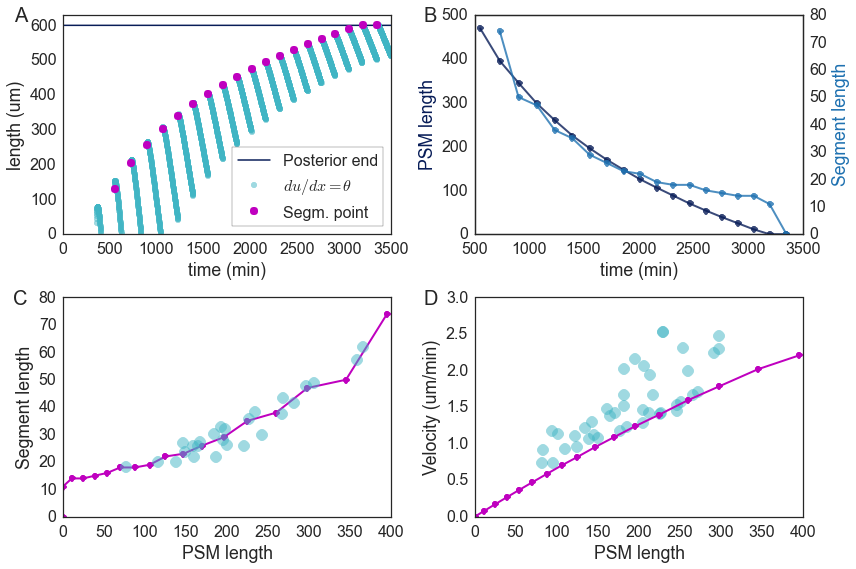

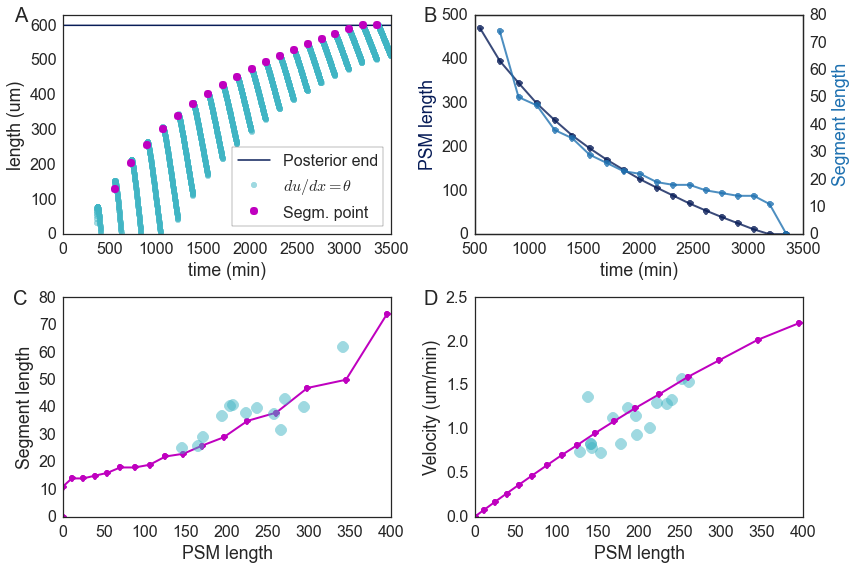

In [3]:
# starting values of the parameters
p = {}
p['a']  = 250.0
p['b']  = 2500.0
p['theta'] = 0.05
p['L0'] = 600.0
p['tr'] = np.arange(0, 3501, 1)

p['T0'] = 160.
plotf.exvivo_segmentation(d37, p)
plotf.exvivo_segmentation(d33, p)

In [4]:
# --- find the set of parameters that best fit the boostrap fit of experimental data  ----
n_sampling = 100
params = ['a', 'b', 'theta', 'T0']
xratio = [1.0, 1.0, 1.0, 1.0]
bounds = ((0.5, 2.), (0.5, 2.), (0.5, 2.), (0.5, 2.))  
x37 = np.zeros((n_sampling, len(params)))
for i in range(n_sampling):
    d37['len_m'] = d37['len_bstrap'][:,i]
    d37['vel_m'] = d37['vel_bstrap'][:,i]
    out = modelf.minimize_bstrap([d37], p, params, xratio, bounds, case='ex-vivo')
    x37[i,:] = out.x

x33 = np.zeros((n_sampling, len(params)))
for i in range(n_sampling):
    d33['len_m'] = d33['len_bstrap'][:,i]
    d33['vel_m'] = d33['vel_bstrap'][:,i]
    out = modelf.minimize_bstrap([d33], p, params, xratio, bounds, case='ex-vivo')
    x33[i,:] = out.x

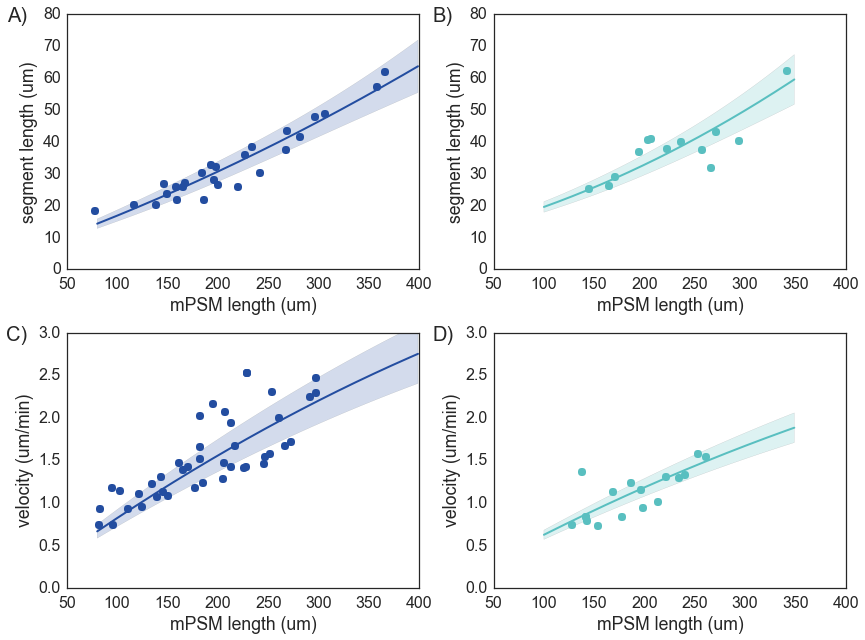

In [5]:
# defining the range of the mPSM and plotting the fit using the model
d37['rPSM'] = np.arange( 80, 400, 1)
d33['rPSM'] = np.arange(100, 350, 1)
plotf.bstrapfit(d37, d33, p, [x37, x33], params, case='ex-vivo')#, save_fig='../figures/ModelFit_exvivo.pdf')

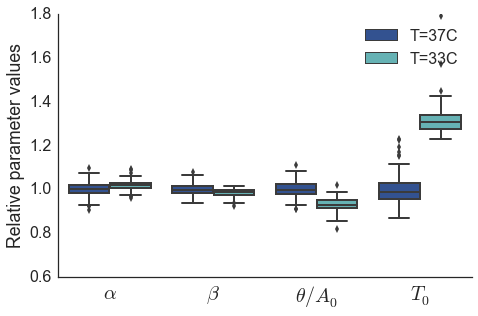

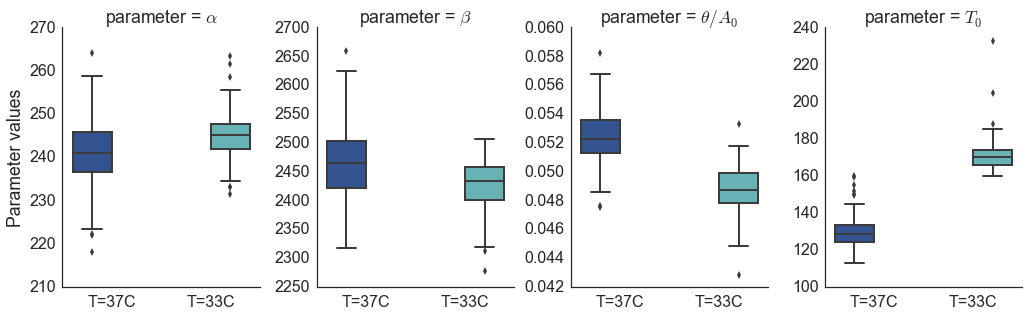

In [7]:
# plotting parameters values and the relationship between T=37 and 33C
p_names = [r'$\alpha$', r'$\beta$', r'$\theta/A_0$', r'$T_0$']
plotf.parameter_values(x37, x33, p, params, p_names, label=['T=37C', 'T=33C'], relative_values=True, 
                       ylim=[0.6, 1.8])
plotf.parameter_values(x37, x33, p, params, p_names, label=['T=37C', 'T=33C'], relative_values=False,
                       aspect=0.8)

In [9]:
print 'Average parameter values for T=37C:'
for i in range(len(params)):
    print params[i], np.mean(x37, axis=0)[i]*p[params[i]], np.std(x37, axis=0)[i]*p[params[i]]
print ''

print 'Average parameter values for  T=33C:'
for i in range(len(params)):
    print params[i], np.mean(x33, axis=0)[i]*p[params[i]], np.std(x33, axis=0)[i]*p[params[i]]

Average parameter values for T=37C:
a 240.851625814 8.04069472156
b 2470.4313248 66.0065156538
theta 0.0524043497667 0.00188770828163
T0 130.006018688 8.5422036757

Average parameter values for  T=33C:
a 245.111543883 5.39117100351
b 2427.47248993 42.8813733646
theta 0.0487371371943 0.00149544042197
T0 171.108761397 8.94307609214
